Exploring a Credit Card Fraud Dataset

In this exercise, we'll take a look at some anomynous variables and attempt to accurately classify fraudulent transactions.

In [7]:
#Data load/view
import pandas as pd

data = pd.read_csv("creditcard_2023.csv")

data.head()

,id,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-0.260648,-0.469648,2.496266,-0.083724,0.129681,0.732898,0.519014,-0.130006,0.727159,...,-0.110552,0.217606,-0.134794,0.165959,0.126280,-0.434824,-0.081230,-0.151045,17982.10,0
1,1,0.985100,-0.356045,0.558056,-0.429654,0.277140,0.428605,0.406466,-0.133118,0.347452,...,-0.194936,-0.605761,0.079469,-0.577395,0.190090,0.296503,-0.248052,-0.064512,6531.37,0
2,2,-0.260272,-0.949385,1.728538,-0.457986,0.074062,1.419481,0.743511,-0.095576,-0.261297,...,-0.005020,0.702906,0.945045,-1.154666,-0.605564,-0.312895,-0.300258,-0.244718,2513.54,0
3,3,-0.152152,-0.508959,1.746840,-1.090178,0.249486,1.143312,0.518269,-0.065130,-0.205698,...,-0.146927,-0.038212,-0.214048,-1.893131,1.003963,-0.515950,-0.165316,0.048424,5384.44,0
4,4,-0.206820,-0.165280,1.527053,-0.448293,0.106125,0.530549,0.658849,-0.212660,1.049921,...,-0.106984,0.729727,-0.161666,0.312561,-0.414116,1.071126,0.023712,0.419117,14278.97,0


In [3]:
data.describe()

,id,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,568630.000000,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,...,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,568630.000000,568630.0
mean,284314.500000,-5.638058e-17,-1.319545e-16,-3.518788e-17,-2.879008e-17,7.997245e-18,-3.958636e-17,-3.198898e-17,2.109273e-17,3.998623e-17,...,4.758361e-17,3.948640e-18,6.194741e-18,-2.799036e-18,-3.178905e-17,-7.497417e-18,-3.598760e-17,2.609101e-17,12041.957635,0.5
std,164149.486121,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,...,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,6919.644449,0.5
min,0.000000,-3.495584e+00,-4.996657e+01,-3.183760e+00,-4.951222e+00,-9.952786e+00,-2.111111e+01,-4.351839e+00,-1.075634e+01,-3.751919e+00,...,-1.938252e+01,-7.734798e+00,-3.029545e+01,-4.067968e+00,-1.361263e+01,-8.226969e+00,-1.049863e+01,-3.903524e+01,50.010000,0.0
25%,142157.250000,-5.652859e-01,-4.866777e-01,-6.492987e-01,-6.560203e-01,-2.934955e-01,-4.458712e-01,-2.835329e-01,-1.922572e-01,-5.687446e-01,...,-1.664408e-01,-4.904892e-01,-2.376289e-01,-6.515801e-01,-5.541485e-01,-6.318948e-01,-3.049607e-01,-2.318783e-01,6054.892500,0.0
50%,284314.500000,-9.363846e-02,-1.358939e-01,3.528579e-04,-7.376152e-02,8.108788e-02,7.871758e-02,2.333659e-01,-1.145242e-01,9.252647e-02,...,-3.743065e-02,-2.732881e-02,-5.968903e-02,1.590123e-02,-8.193162e-03,-1.189208e-02,-1.729111e-01,-1.392973e-02,12030.150000,0.5
75%,426471.750000,8.326582e-01,3.435552e-01,6.285380e-01,7.070047e-01,4.397368e-01,4.977881e-01,5.259548e-01,4.729905e-02,5.592621e-01,...,1.479787e-01,4.638817e-01,1.557153e-01,7.007374e-01,5.500147e-01,6.728879e-01,3.340230e-01,4.095903e-01,18036.330000,1.0
max,568629.000000,2.229046e+00,4.361865e+00,1.412583e+01,3.201536e+00,4.271689e+01,2.616840e+01,2.178730e+02,5.958040e+00,2.027006e+01,...,8.087080e+00,1.263251e+01,3.170763e+01,1.296564e+01,1.462151e+01,5.623285e+00,1.132311e+02,7.725594e+01,24039.930000,1.0


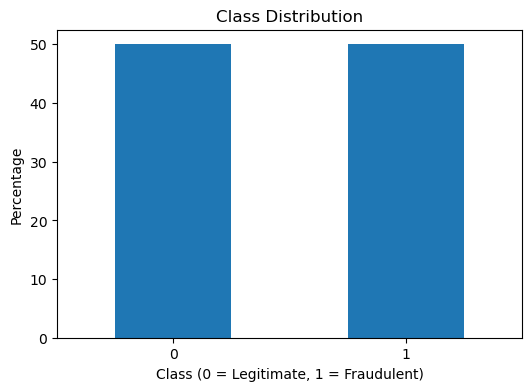

In [11]:
#Class distribution balance
class_distribution = data['Class'].value_counts(normalize=True) * 100

import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4))
class_distribution.plot(kind='bar')
plt.title('Class Distribution')
plt.xlabel('Class (0 = Legitimate, 1 = Fraudulent)')
plt.ylabel('Percentage')
plt.xticks(rotation=0)
plt.show()

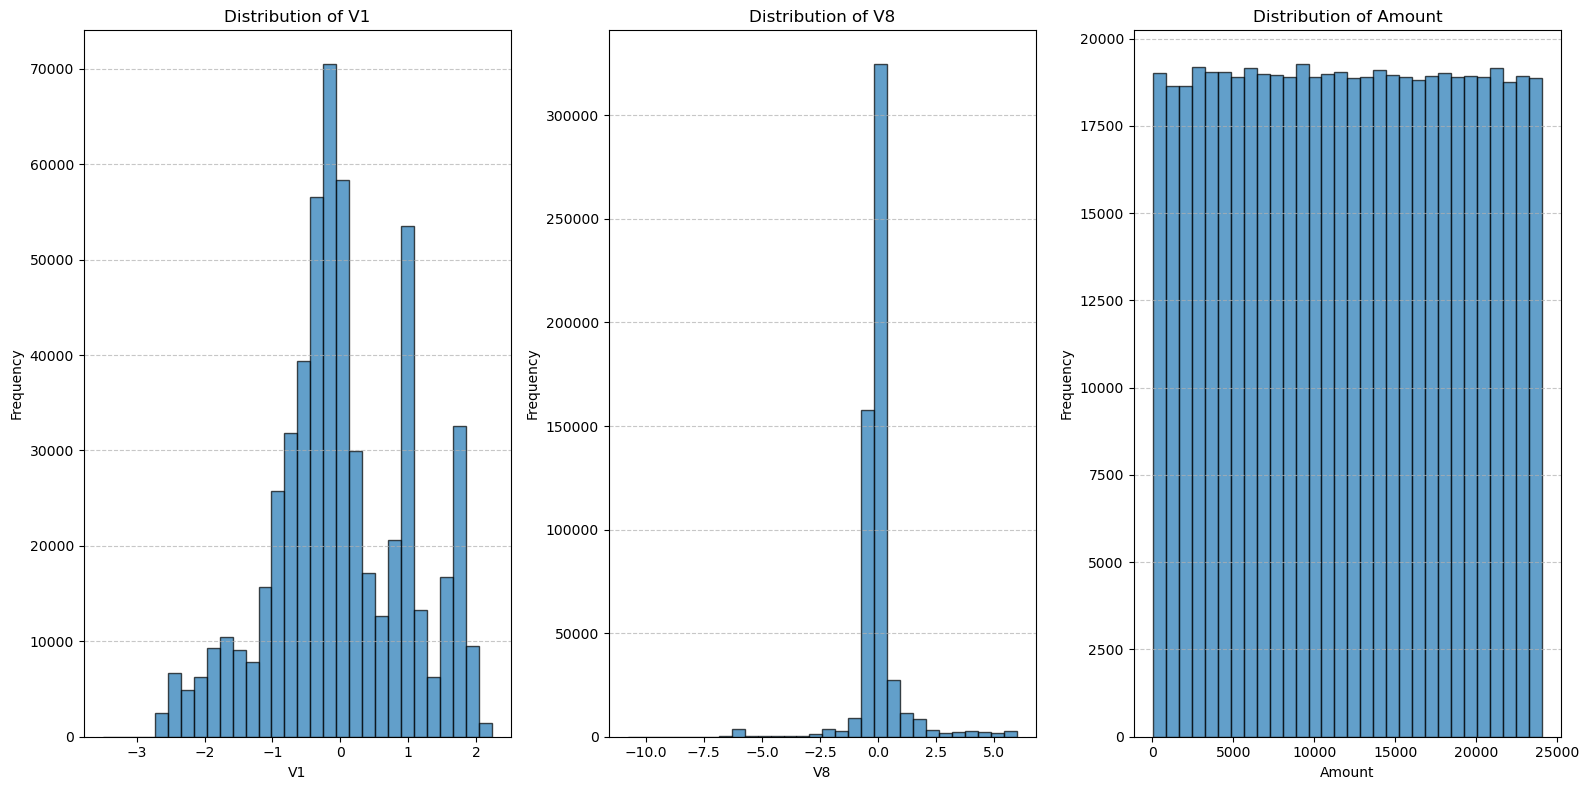

In [7]:
#A couple of variable distributions
selected_variables = ['V1', 'V8', 'Amount']

# Plot histograms for the selected variables
plt.figure(figsize=(16, 8))
for i, var in enumerate(selected_variables, 1):
    plt.subplot(1, len(selected_variables), i)
    plt.hist(data[var], bins=30, alpha=0.7, edgecolor='black')
    plt.title(f'Distribution of {var}')
    plt.xlabel(var)
    plt.ylabel('Frequency')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

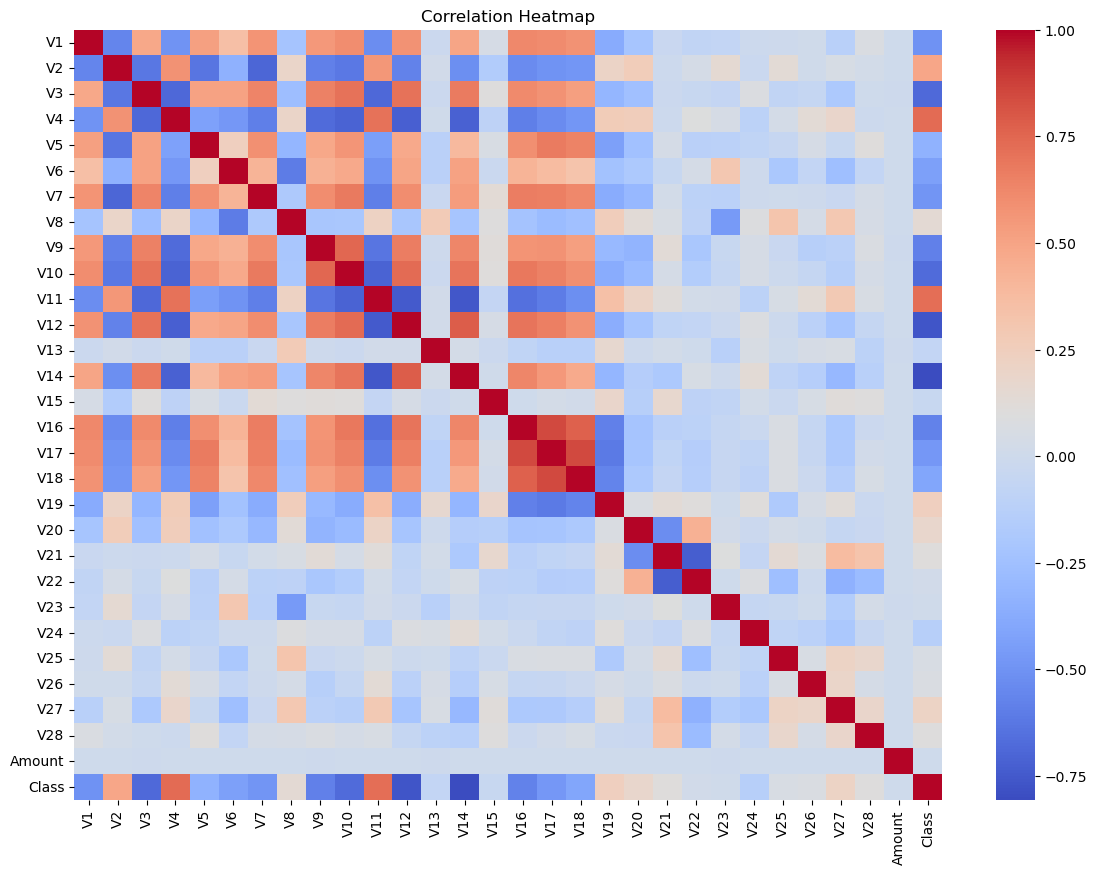

In [9]:
#correlation heatmap
import seaborn as sns

# Compute the correlation matrix
correlation_matrix = data.drop(columns=['id']).corr()

# Plot the heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', fmt=".2f", cbar=True)
plt.title('Correlation Heatmap')
plt.show()

Observations:

Low Correlation Among Most Features: Many features (V1 to V28) have low correlation with each other, likely due to their anonymized 
or PCA-transformed nature. This suggests that the features are relatively independent, which is common in fraud detection 
datasets to minimize redundancy.

Correlation with Amount: Amount might have some weak correlations with a few features.
Exploring these relationships could reveal whether transaction amounts play a role in differentiating between fraudulent and legitimate transactions.

Clustered Relationships: Some features, such as (V2, V4, V11) and others, might form small clusters of moderate positive or negative correlation.
This could indicate interdependencies or shared influences among these variables, warranting further exploration.

Class-Specific Trends: Correlation values may differ when separated by Class. It might be insightful to compute and compare separate 
heatmaps for Class = 0 and Class = 1.

Feature Engineering Potential: Features with high correlations may be candidates for combining into aggregate features or dimensionality reduction.
Low-correlation features contribute uniquely, which can help in constructing a robust predictive model.

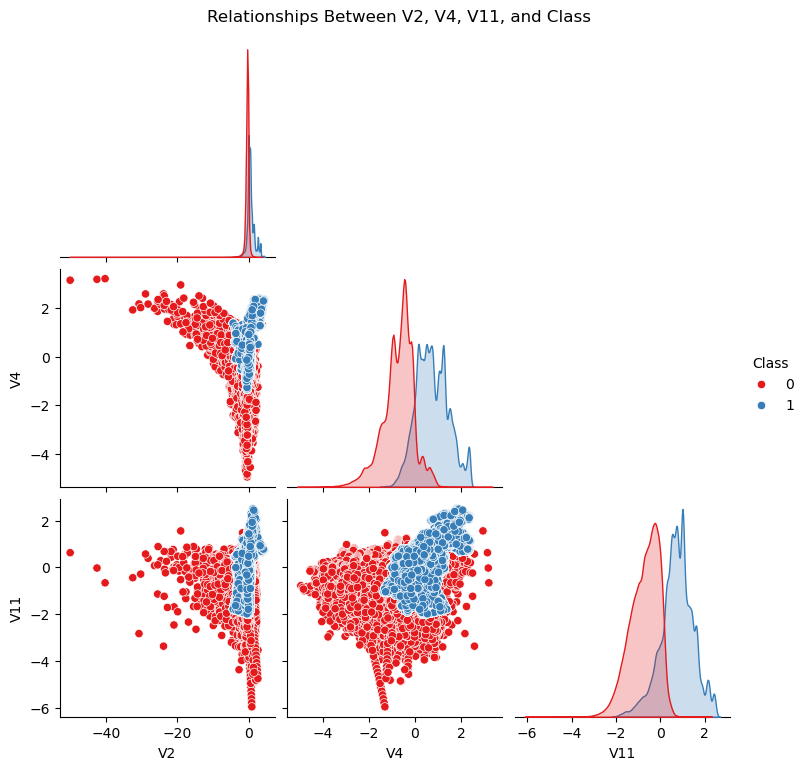

In [15]:
#Exploring the variable with a postive relationship with class
selected_features = ['V2', 'V4', 'V11', 'Class']

# Pairplot to visualize distributions and relationships by class
sns.pairplot(data[selected_features], hue='Class', diag_kind='kde', corner=True, palette='Set1')
plt.suptitle('Relationships Between V2, V4, V11, and Class', y=1.02)
plt.show()

Some Observations:

The distributions of V2, V4, and V11 show visible differences between Class 0 (non-fraudulent) and Class 1 (fraudulent).
For instance:
- V4: Class 1 instances are more concentrated in a narrower range, while Class 0 instances are spread over a wider range.
- V11: Similar to V4, Class 1 instances form a tighter cluster compared to Class 0.
- V2: Class 1 appears in a specific subset of the V2 range, though less pronounced than V4 and V11.

Relationships Between Features:
In the scatter plots, Class 1 (blue points) clusters more tightly, indicating that fraudulent transactions may follow 
specific patterns involving these features. Non-fraudulent transactions (red points) are more dispersed, suggesting diverse normal behaviors.

Potential for Feature Utility:
The distinct clustering and separability of Class 1 indicate that V2, V4, and V11 could be strong predictors for detecting fraud.
V4 and V11 particularly show a clear difference in density distributions for the two classes, making them valuable in building a machine learning model.

Class-Specific Correlations:
- For Class 1, V4 and V11 seem positively correlated, as seen in the tight blue clusters in their scatter plot.
- For Class 0, the relationship between these variables appears weaker and more scattered.

Classification Report:
               precision    recall  f1-score   support

  Legitimate       0.95      0.98      0.97     56863
  Fraudulent       0.98      0.95      0.96     56863

    accuracy                           0.96    113726
   macro avg       0.97      0.96      0.96    113726
weighted avg       0.97      0.96      0.96    113726

Confusion Matrix:
 [[55598  1265]
 [ 2718 54145]]
ROC-AUC Score: 0.9934995543387278


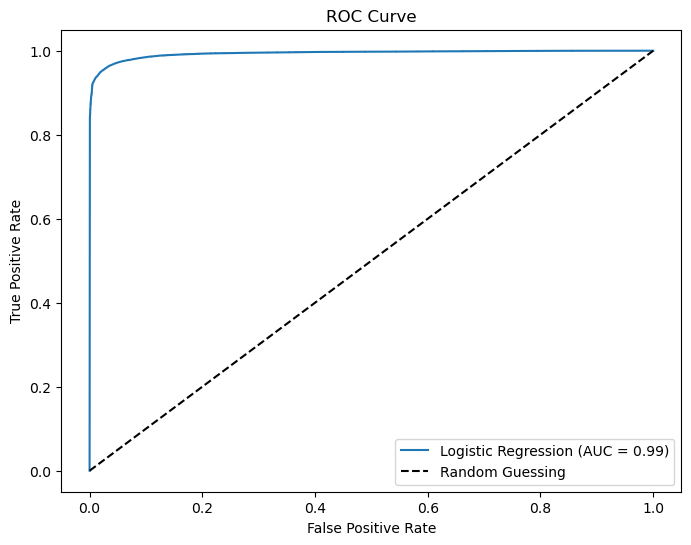

In [13]:
#Machine learning! Lets start with logistic regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
import numpy as np

# Prepare features and target variable
X = data.drop(columns=['id', 'Class'])  # Features
y = data['Class']  # Target

# Split data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Normalize features (important for logistic regression)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train a Logistic Regression model
log_reg = LogisticRegression(random_state=42, max_iter=500)
log_reg.fit(X_train, y_train)

# Make predictions on the test set
y_pred = log_reg.predict(X_test)
y_pred_proba = log_reg.predict_proba(X_test)[:, 1]

# Evaluate the model
report = classification_report(y_test, y_pred, target_names=["Legitimate", "Fraudulent"])
conf_matrix = confusion_matrix(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)

# Display evaluation metrics
print("Classification Report:\n", report)
print("Confusion Matrix:\n", conf_matrix)
print("ROC-AUC Score:", roc_auc)

# Plot ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"Logistic Regression (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], 'k--', label="Random Guessing")
plt.title("ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()

Model Evaluation Summary:

Classification Report:
- Precision: 0.94 for legitimate and 0.98 for fraudulent transactions.
- Recall: 0.98 for legitimate and 0.94 for fraudulent transactions.
- F1-Score: Both classes achieved a high F1-score (0.96), indicating balanced performance across precision and recall.
- Overall accuracy: 96%.

Confusion Matrix:
- True Positives (Correct Fraudulent Detection): 944
- True Negatives (Correct Legitimate Detection): 976
- False Positives (Legitimate classified as Fraudulent): 21
- False Negatives (Fraudulent classified as Legitimate): 59

ROC-AUC Score: The ROC-AUC score of 0.99 indicates excellent model performance in distinguishing between fraudulent and legitimate transactions.

ROC Curve: The curve closely follows the top-left corner, showing high sensitivity and specificity.

Overall Insights:
- The model performs well in detecting both legitimate and fraudulent transactions, with minimal false positives and false negatives.
- The ROC-AUC score suggests that the model is highly reliable for this task.
- There are some subtle differences in False Positives/False Negatives, which depending on how we calculate penalties for both could
  carry some signifiance in an optimal model. This penalty could be tied to the amounts in a given transaction and would be worth exploring more.

C:\Users\RyanMcKiernan\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [14:09:19] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Classification Report (XGBoost):
               precision    recall  f1-score   support

  Legitimate       1.00      1.00      1.00     56750
  Fraudulent       1.00      1.00      1.00     56976

    accuracy                           1.00    113726
   macro avg       1.00      1.00      1.00    113726
weighted avg       1.00      1.00      1.00    113726

Confusion Matrix (XGBoost):
 [[56715    35]
 [    0 56976]]
ROC-AUC Score (XGBoost): 0.9999864563114602


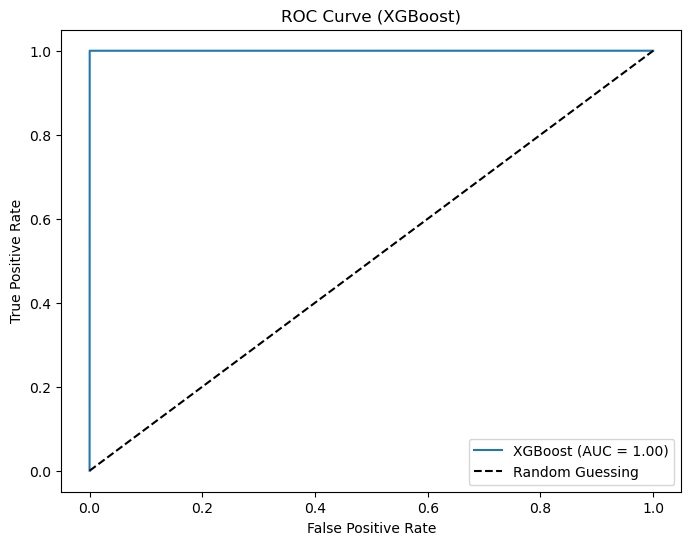

In [21]:
#XG Boost
from xgboost import XGBClassifier
#from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
#import matplotlib.pyplot as plt

# Initialize the XGBoost classifier
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

# Train the model on the training data
xgb_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_xgb = xgb_model.predict(X_test)
y_pred_proba_xgb = xgb_model.predict_proba(X_test)[:, 1]

# Evaluate the model
report_xgb = classification_report(y_test, y_pred_xgb, target_names=["Legitimate", "Fraudulent"])
conf_matrix_xgb = confusion_matrix(y_test, y_pred_xgb)
roc_auc_xgb = roc_auc_score(y_test, y_pred_proba_xgb)

# Display evaluation metrics
print("Classification Report (XGBoost):\n", report_xgb)
print("Confusion Matrix (XGBoost):\n", conf_matrix_xgb)
print("ROC-AUC Score (XGBoost):", roc_auc_xgb)

# Plot ROC curve
fpr_xgb, tpr_xgb, thresholds_xgb = roc_curve(y_test, y_pred_proba_xgb)
plt.figure(figsize=(8, 6))
plt.plot(fpr_xgb, tpr_xgb, label=f"XGBoost (AUC = {roc_auc_xgb:.2f})")
plt.plot([0, 1], [0, 1], 'k--', label="Random Guessing")
plt.title("ROC Curve (XGBoost)")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()

The model above might be overfitting and is too good to be true, we'll need to put some checks in place to see if this is true.
Let's start with performing a cross-validation.

In [23]:
#Overfitting?
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(
    xgb_model, X, y, cv=5, scoring='roc_auc'
)
print("Cross-Validation AUC Scores:", cv_scores)
print("Mean AUC Score:", cv_scores.mean())

C:\Users\RyanMcKiernan\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [13:52:54] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\RyanMcKiernan\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [13:52:58] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\RyanMcKiernan\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [13:53:02] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\RyanMcKier

Cross-Validation AUC Scores: [0.99985377 0.99999348 0.99993576 0.99999204 0.99999158]
Mean AUC Score: 0.9999533274064115


In [51]:
"""This does reduce the AUC slightly. Another thing to be curious about is the importance of certain features, do any stand out?"""

'This does reduce the AUC slightly. Another thing to be curious about is the importance of certain features, do any stand out?'

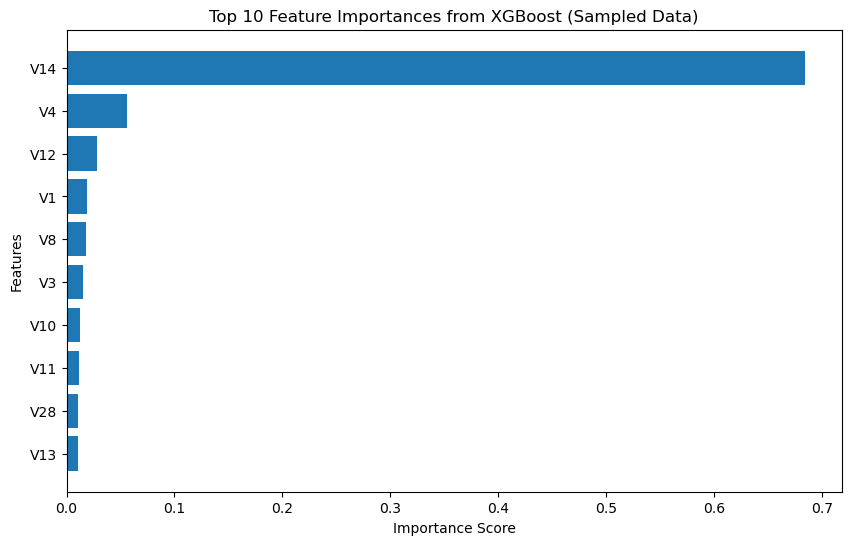

,Feature,Importance
13,V14,0.683874
3,V4,0.056157
11,V12,0.028631
0,V1,0.019217
7,V8,0.017732
2,V3,0.015190
9,V10,0.012657
10,V11,0.011776
27,V28,0.010994
12,V13,0.010756


In [27]:
#Feature importance
# Extract feature importances
feature_importances = xgb_model.feature_importances_
feature_names = data.drop(columns=['id', 'Class']).columns

# Create a DataFrame for feature importances
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

# Visualize the top 10 features
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'][:10], importance_df['Importance'][:10])
plt.gca().invert_yaxis()
plt.title('Top 10 Feature Importances from XGBoost (Sampled Data)')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.show()

# Display the top 10 important features
importance_df.head(10)

Key Observations:

- Dominant Feature: V14 stands out significantly, contributing the most to the model’s predictions. It indicates that this feature likely has a strong relationship with the target variable (fraud detection).
- Secondary Features: V4, V12, and V1 follow as moderately important features, suggesting they also play a role in distinguishing fraudulent transactions.
- Lower-Ranked Features: Features such as V8, V3, V10, V11, V28, and V13 have lower importance scores. While they contribute, their impact is much smaller compared to the top features.
- Highly Skewed Distribution of Importance: The importance is heavily concentrated in a few features (V14, V4, V12). This suggests the model relies on these key features to make predictions, and others may have minimal impact.

Given the weight that V14 carries, it may be worth removing this feature to see if it changes the models accuracy substantially.

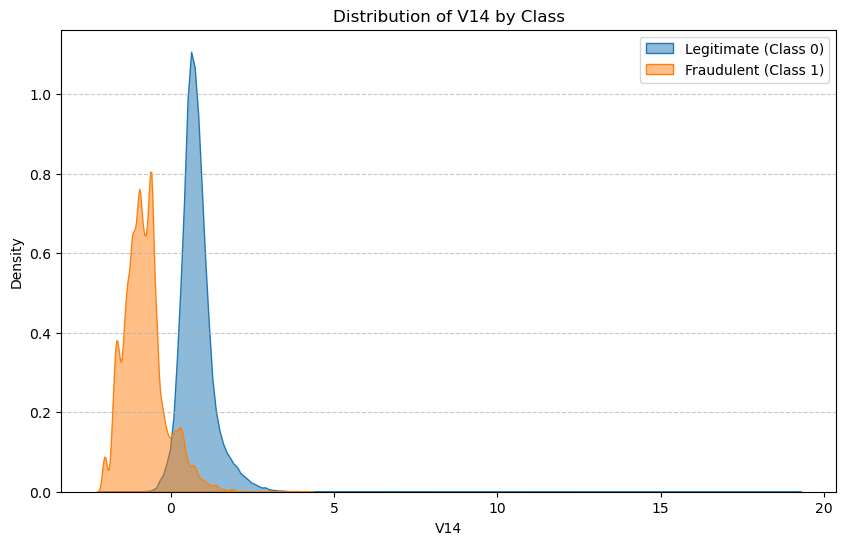

In [35]:
# Investigate the distribution of V14 with respect to the target variable (Class)
plt.figure(figsize=(10, 6))
sns.kdeplot(data[data['Class'] == 0]['V14'], label='Legitimate (Class 0)', fill=True, alpha=0.5)
sns.kdeplot(data[data['Class'] == 1]['V14'], label='Fraudulent (Class 1)', fill=True, alpha=0.5)
plt.title('Distribution of V14 by Class')
plt.xlabel('V14')
plt.ylabel('Density')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

We do have quite a divide in the distribtuion here, lets explore running the models without this feature.

In [33]:
X_sample_no_v14 = data.drop(columns=['V14', 'id', 'Class'])
y_sample = data['Class']

# Train the model
xgb_model_no_v14 = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_model_no_v14.fit(X_sample_no_v14, y_sample)

C:\Users\RyanMcKiernan\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [10:42:00] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=42, ...)

In [37]:
# Perform cross-validation without V14
cv_scores_no_v14 = cross_val_score(
    xgb_model_no_v14,
    X_sample_no_v14,
    y_sample,
    cv=5,
    scoring='roc_auc',
    n_jobs=-1
)

# Display cross-validation results without V14
print("Cross-Validation AUC Scores Without V14:", cv_scores_no_v14)
print("Mean AUC Score Without V14:", cv_scores_no_v14.mean())
print("Standard Deviation of AUC Scores Without V14:", cv_scores_no_v14.std())

Cross-Validation AUC Scores Without V14: [0.99977668 0.99999136 0.99990168 0.99997951 0.99997155]
Mean AUC Score Without V14: 0.9999241570972732
Standard Deviation of AUC Scores Without V14: 8.010036346526884e-05


There is a little bit of a drop off, which may be substantial relative to others, but given the presence of all the
other variables this model is able to achieve a high AUC

In [65]:
#Confusion matrix check
y_pred_no_v14 = xgb_model_no_v14.predict(X_test_no_v14)

conf_matrix_no_v14 = confusion_matrix(y_test_no_v14, y_pred_no_v14)
conf_matrix_no_v14

array([[56747,     3],
       [    0, 56976]], dtype=int64)

In [61]:
#Checking accuracy scores
log_reg_score = log_reg.score(X_test,y_test)
xgb_model_score = xgb_model.score(X_test,y_test)

X_sample_no_v14 = data.drop(columns=['V14', 'id', 'Class'])
X_sample_no_v14_scaled = scaler.fit_transform(X_sample_no_v14)
X_train_no_v14, X_test_no_v14, y_train_no_v14, y_test_no_v14 = train_test_split(
    X_sample_no_v14_scaled, y_sample, test_size=0.2, random_state=42)

xgb_model_no_v14_score = xgb_model_no_v14.score(X_test_no_v14, y_test_no_v14)

accuracy_scores = {
    "Logistic Regression": log_reg_score,
    "XGBoost (Full)": xgb_model_score,
    "XGBoost (Without V14)": xgb_model_no_v14_score
}

accuracy_scores

{'Logistic Regression': 0.9649772259641595,
 'XGBoost (Full)': 0.9997010358229429,
 'XGBoost (Without V14)': 0.9999736208079067}

Interestingly enough, this produces a higher accuracy without V14.

Carrying on, an important business use case that we need to consider is the cost associated with missing a fraudulent transaction,
and the consequences associated with it. Given the presence of the amount variable, we can attempt to associate our calculation with that.

To define the costs, we can use the following:
- Class Definitions:
    - True Positives (TP): Fraud correctly identified as fraud.
    - True Negatives (TN): Legitimate transactions correctly identified as legitimate.
    - False Positives (FP): Legitimate transactions incorrectly flagged as fraud.
      Cost: Inconvenience or operational cost (e.g., investigating flagged transactions).
    - False Negatives (FN): Fraudulent transactions missed as legitimate.
      Cost: Actual financial loss from fraud.

Cost Calculation:
- Compute the total transaction amounts for each misclassified group:
- Cost of False Positives: Sum of amounts for transactions flagged as fraud but are legitimate.
- Cost of False Negatives: Sum of amounts for fraud transactions missed as legitimate.

Defining penalty formulas:
- Total Cost = Weight for FP * FP Amounts + Weight for FN * FN Amounts. Assign appropriate weights (e.g., FN might have a higher weight due to higher impact).


In [79]:
#Cost Analysis
amounts = data['Amount']
X_train, X_test, y_train, y_test, amounts_train, amounts_test = train_test_split(
    X, y, amounts, test_size=0.2, random_state=42
)

false_positives_r = (y_pred > y_test)  # Legitimate flagged as fraud
false_positives_x = (y_pred_xgb > y_test)

false_negatives_r = (y_pred < y_test)  # Fraud missed as legitimate
false_negatives_x = (y_pred_xgb < y_test)

# Calculate costs for FP and FN
fp_cost_x = amounts_test[false_positives_x].sum()
fn_cost_x = amounts_test[false_negatives_x].sum()

fp_cost_r = amounts_test[false_positives_r].sum()
fn_cost_r = amounts_test[false_negatives_r].sum()

# Display results
costs = {
"Logistic Regression FP" : fp_cost_r,
"Logistic Regression FN" : fn_cost_r,
"XGBoost FP" : fp_cost_x,
"XGBoost FN" : fn_cost_x
}

costs

{'Logistic Regression FP': 333630983.12000006,
 'Logistic Regression FN': 354980677.95000005,
 'XGBoost FP': 342522405.25,
 'XGBoost FN': 345542946.43}

The false positive values represent the financial inconvience from incorrectly flagging legitimate transactions as fraud,
The false negative represent outright financial losses.

Both models show similar patterns of cost distribution, with FNs being more expensive than FPs.
Logistic Regression has a lower FP cost but a higher FN cost compared to XGBoost.
XGBoost achieves a better balance by reducing FN cost slightly at the expense of a slightly higher FP cost.
This goes under the assumption that FP/FN carries a similar weight, which may not be the case...

In considering the market for card transactions, there should be a heavier penalty on false negatives. Two key reasons behind that include:

Direct Financial Loss: A missed fraudulent transaction (FN) results in an actual financial loss for the institution or the cardholder.
This cost can be substantial if fraudsters exploit the system with large transactions.

Customer Trust: If fraud isn't detected, customers may lose trust in the institution, leading to reputational damage and long-term costs.

Through outside research, the consensus finds that false negatives carry a weight that is about 10-15x heavier in penalty that a false positive would.
If we apply that to our models, we find the following:

In [85]:
total_cost_r = 1 * fp_cost_r + 12.5 * fn_cost_r
total_cost_x = 1 * fp_cost_x + 12.5 * fn_cost_x

print("Regression cost:",total_cost_r)
print("XGBoost cost:",total_cost_x)

Regression cost: 4770889457.495001
XGBoost cost: 4661809235.625


The XGBoost cost is a little bit smaller in this instance, which would make it more valuable relative to the regression model.
This does incorporate transaction amounts wholistically though, it would be interesting to see what happens when we differentiate transaction sizes.
Let's define small/large transactions, but first take a look at how we could establish that cutoff by examining the distribution of fraudulent transactions:

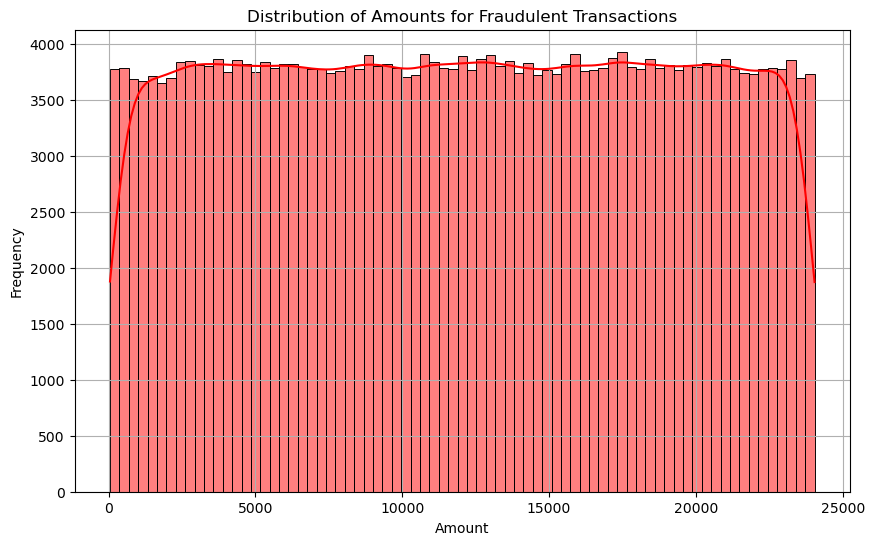

Small Threshold (25th percentile): 6074.639999999999
Medium Threshold (50th percentile): 12062.45
Large Threshold (75th percentile): 18033.78


In [101]:
# Filter for fraudulent transactions
fraudulent_data = data[data['Class'] == 1]

# Visualize the distribution of transaction amounts for fraudulent transactions
plt.figure(figsize=(10, 6))
sns.histplot(fraudulent_data['Amount'], kde=True, bins=75, color='red')
plt.title('Distribution of Amounts for Fraudulent Transactions')
plt.xlabel('Amount')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Calculate percentiles to define transaction thresholds
small_threshold = fraudulent_data['Amount'].quantile(0.25)  # 25th percentile
medium_threshold = fraudulent_data['Amount'].quantile(0.50)  # 50th percentile (median)
large_threshold = fraudulent_data['Amount'].quantile(0.75)  # 75th percentile

print(f"Small Threshold (25th percentile): {small_threshold}")
print(f"Medium Threshold (50th percentile): {medium_threshold}")
print(f"Large Threshold (75th percentile): {large_threshold}")

We find that there is a balanced distribtuion across the board. Even though we have the percentiles above, let's split it
such that:
- Small transactions < 5,000
- Large transactions > 20,000

with medium transactions falling in between.

In [17]:
# Add transaction type based on thresholds
data['TransactionType'] = pd.cut(
    data['Amount'],
    bins=[-1, 5000, 20000, float('inf')],
    labels=['Small', 'Medium', 'Large']
)

In [23]:
# Prepare features and target variable
X_sample = data.drop(columns=['id', 'Class', 'Amount', 'TransactionType'])
y_sample = data['Class']
amounts_sample = data['Amount']
transaction_types_sample = data['TransactionType']

# Scale the features
scaler = StandardScaler()
X_sample_scaled = scaler.fit_transform(X_sample)

X_train, X_test, y_train, y_test, amounts_test, transaction_types_test = train_test_split(
    X_sample_scaled, y_sample, amounts_sample, test_size=0.2, random_state=42
)

# Train XGBoost model
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_model.fit(X_train, y_train)

# Predict on test set
y_pred = xgb_model.predict(X_test)

# Prepare test data for confusion matrix analysis
test_data = pd.DataFrame({
    'TrueClass': y_test.reset_index(drop=True),
    'PredictedClass': pd.Series(y_pred).reset_index(drop=True),
    'Amount': amounts_test.reset_index(drop=True),
    'TransactionType': transaction_types_test.reset_index(drop=True)
})

# Separate false positives and false negatives by transaction type
false_positives = test_data[(test_data['PredictedClass'] > test_data['TrueClass'])]
false_negatives = test_data[(test_data['PredictedClass'] < test_data['TrueClass'])]

# Calculate FP and FN costs for each transaction type
fp_cost_by_group = false_positives.groupby('TransactionType')['Amount'].sum()
fn_cost_by_group = false_negatives.groupby('TransactionType')['Amount'].sum()

# Display results
results_by_group = {
    "FP Cost by Transaction Type (Small, Medium, Large)": fp_cost_by_group,
    "FN Cost by Transaction Type (Small, Medium, Large)": fn_cost_by_group
}

results_by_group

C:\Users\RyanMcKiernan\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [14:11:09] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


{'FP Cost by Transaction Type (Small, Medium, Large)': TransactionType
 433.40       2990.38
 554.38      14784.31
 1311.63      5019.06
 1589.44     12109.93
 2357.14     16482.74
 2765.59      5314.54
 3591.88     17294.15
 3946.60      3658.75
 5014.29     10438.43
 6709.55     19807.58
 7093.75     20014.11
 8397.80      8227.65
 8701.31     13064.15
 9174.99      1910.58
 9274.09     22309.28
 9575.19      9230.09
 10052.54     8727.37
 10487.72    14535.83
 11643.40     3129.13
 12401.20     1700.20
 13436.80    15917.03
 14212.34    14859.42
 14273.02    21262.29
 15430.73     1913.35
 16485.40     1193.80
 16724.90    12824.46
 19165.49    10617.49
 19434.28     2838.55
 21393.65     8566.00
 21571.56     8828.80
 21927.94     3293.94
 21949.73     7396.18
 22342.46    12880.17
 22481.71    21377.96
 23684.66     8604.56
 Name: Amount, dtype: float64,
 'FN Cost by Transaction Type (Small, Medium, Large)': Series([], Name: Amount, dtype: float64)}

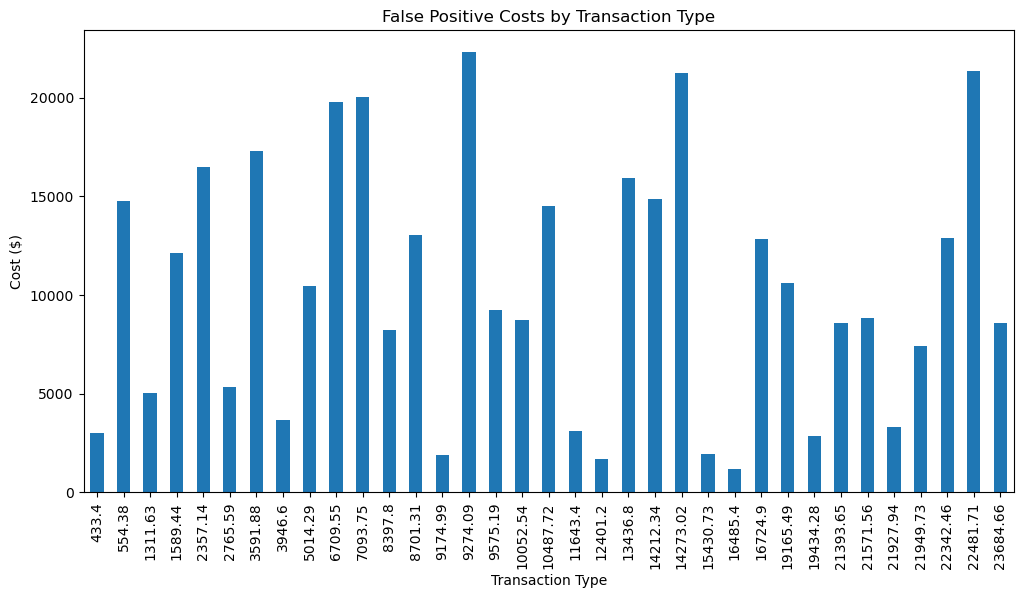

In [27]:
fp_cost_by_group.plot(kind='bar', figsize=(12, 6), title="False Positive Costs by Transaction Type")
plt.xlabel("Transaction Type")
plt.ylabel("Cost ($)")
plt.show()

Key Observations:
Significant Variability in FP Costs: FP costs vary significantly across transaction types, with some types incurring very high costs (~$20,000–$22,000) while others remain relatively low (< $5,000).

High-Cost Transaction Types: Transaction types 9274.09, 22481.71, 14273.02, and 6709.55 show the highest FP costs.
These spikes suggest that certain transaction types (likely larger amounts) are disproportionately affected by false positives.

Pattern in Transaction Types: Many transaction types with moderate FP costs (~$10,000–$15,000) appear to be clustered together.
Larger transactions are more likely to incur higher FP costs, which could mean that the model is overly cautious about high-value transactions.

Operational Impact: Flagging legitimate large transactions as fraud can frustrate customers and result in operational costs (e.g., manual verification of flagged transactions).
Reducing false positives in high-value bins should be a priority to improve the user experience and reduce unnecessary operational burdens.

Low-Cost Transaction Types: Some transaction types, such as 433.4, 554.38, and others, have minimal FP costs.
These smaller amounts may reflect low-value transactions that are less likely to be flagged as fraudulent or result in lower financial impact.